<a href="https://colab.research.google.com/github/Sopiaa2/daily_project_test/blob/main/LandSlide_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#데이터 불러오기

#  GLC(Global Landslide Catalog)는 규모, 영향 또는 위치에 관계없이 전 세계에서 강우로 인한 산사태를 식별하는 것을 목표로 개발되었습니다.
#  GLC는 미디어, 재해 데이터베이스, 과학 보고서 또는 기타 출처에서 보고된 강우에 의해 촉발된 모든 유형의 대중 이동을 고려합니다.

"""
일반적으로 이 csv 파일에는 다음과 같은 세부 정보가 포함되어 있습니다.

1. 산사태 날짜
2. 산사태 유발 원인: 비, 호우, 사이클론 등
3. 산사태 규모: 대, 중, 소
4. 숙명
5. 다쳐서
6. 이벤트 국가
7. 위도
8. 경도

"""
import folium
map = folium.Map(
    location = [37.566345, 126.977893],
    #tiles = 'St'
)
map

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")

##EDA

In [29]:
#데이터 불러오기

In [30]:
data = pd.read_csv('/content/drive/MyDrive/machine_learning_data/new1SupervisedDataSet.csv')
data

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,temperature,humidity,rain,moisture,pressure
0,0,2.00,3.33,1.67,4.00,2.67,2.33,3.00,2.67,3.00,2.67,2.67,2.33,18.21,84.33,"26,668.92",31.25,"1,017.90"
1,0,4.00,2.67,2.33,2.00,2.33,1.67,2.33,2.67,2.67,4.33,3.33,2.00,19.17,73.91,"27,103.17",75.94,"1,013.19"
2,0,3.00,2.67,3.00,2.00,2.00,2.00,2.67,3.00,3.00,5.00,3.33,2.00,22.79,78.17,"26,689.17",51.23,"1,016.09"
3,0,3.00,2.67,2.67,2.67,3.00,1.33,3.33,2.67,2.67,5.00,3.00,2.67,23.30,81.47,"18,678.75",72.09,"1,017.48"
4,0,2.67,3.67,2.33,3.67,1.67,3.67,2.67,3.00,3.00,3.67,2.00,3.33,22.45,80.01,"26,713.92",53.48,"1,013.23"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190885,0,2.33,2.67,2.00,4.67,2.33,3.00,1.33,4.00,2.33,3.33,3.00,3.33,15.97,78.34,"26,724.42",48.61,"1,017.95"
190886,0,3.00,3.00,2.33,3.00,3.00,1.67,2.00,4.00,2.67,4.00,2.67,3.00,21.29,82.41,245.25,24.16,957.41
190887,0,3.00,3.00,2.00,1.33,2.33,1.67,1.67,4.33,3.00,3.33,3.33,2.00,20.50,83.09,"23,715.00",37.06,"1,019.67"
190888,0,3.33,4.00,2.67,3.00,2.00,2.33,3.33,2.33,3.67,4.67,2.33,4.33,25.39,74.95,108.00,10.97,"1,005.39"


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190890 entries, 0 to 190889
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Landslide      190890 non-null  int64  
 1   Aspect         190890 non-null  float64
 2   Curvature      190890 non-null  float64
 3   Earthquake     190890 non-null  float64
 4   Elevation      190890 non-null  float64
 5   Flow           190890 non-null  float64
 6   Lithology      190890 non-null  float64
 7   NDVI           190890 non-null  float64
 8   NDWI           190890 non-null  float64
 9   Plan           190890 non-null  float64
 10  Precipitation  190890 non-null  float64
 11  Profile        190890 non-null  float64
 12  Slope          190890 non-null  float64
 13  temperature    190890 non-null  float64
 14  humidity       190890 non-null  float64
 15  rain           190890 non-null  float64
 16  moisture       190890 non-null  float64
 17  pressure       190890 non-nul

In [31]:
#결측치 제거

In [32]:
df1 = data.copy()

In [33]:
df1.isnull().sum()

Landslide        0
Aspect           0
Curvature        0
Earthquake       0
Elevation        0
Flow             0
Lithology        0
NDVI             0
NDWI             0
Plan             0
Precipitation    0
Profile          0
Slope            0
temperature      0
humidity         0
rain             0
moisture         0
pressure         0
dtype: int64

In [34]:
#소수점 간편화

In [96]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [36]:
df1.shape

(190890, 18)

In [37]:
df1.head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,temperature,humidity,rain,moisture,pressure
0,0,2.00,3.33,1.67,4.00,2.67,2.33,3.00,2.67,3.00,2.67,2.67,2.33,18.21,84.33,"26,668.92",31.25,"1,017.90"
1,0,4.00,2.67,2.33,2.00,2.33,1.67,2.33,2.67,2.67,4.33,3.33,2.00,19.17,73.91,"27,103.17",75.94,"1,013.19"
2,0,3.00,2.67,3.00,2.00,2.00,2.00,2.67,3.00,3.00,5.00,3.33,2.00,22.79,78.17,"26,689.17",51.23,"1,016.09"
3,0,3.00,2.67,2.67,2.67,3.00,1.33,3.33,2.67,2.67,5.00,3.00,2.67,23.30,81.47,"18,678.75",72.09,"1,017.48"
4,0,2.67,3.67,2.33,3.67,1.67,3.67,2.67,3.00,3.00,3.67,2.00,3.33,22.45,80.01,"26,713.92",53.48,"1,013.23"


In [38]:
df1.columns

Index(['Landslide', 'Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow',
       'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile',
       'Slope', 'temperature', 'humidity', 'rain', 'moisture', 'pressure'],
      dtype='object')

In [95]:
"""컬럼 해석"""
# Landslide : 산사태 유무
# Aspect : 측면
#	Curvature	Earthquake : 곡률
#	Elevation	 : 높이 (지상과 산의 차이)
# Flow : 흐름(범람하다,넘치다)
#	Lithology : 암석학(화강암 등등)
#	NDVI (Normalized Difference Vegetation Index) : 식생을 정량화 할때 사용하는 식생 지수 (값이 높을수록 더 건강한 식물)
# NDWI (Normalized Difference Water Index) : 수역지역(water body)을 나타내는데 널리 사용되고 있다. (물 분포)
# Plan : drop
# Precipitation : 강수량
#	Profile : drop
#	Slope	: 경사
# temperature : 온도
#	humidity : 습기
#	rain : 비
#	moisture : 수분
# pressure : 압력

'컬럼 해석'

In [40]:
#필요없는 컬럼 삭제

In [41]:
df1.drop(columns = ['Plan', 'Profile','Precipitation'], inplace= True)
#강수량과 비의 컬럼은 도메인적으로 상호상관관계가 강해보이지만, 데이터로 봤을때 강수량은 표준화 되어있다. 
#두 개의 데이터가 혹시나 다중공선성을 일으킬수도 있을수도 있기 때문에 risk를 줄이고자 하나의 데이터만 가져가려고 한다.
#비의 양 rain 컬럼을 들고 간다.

In [98]:
# 산사태의 유무가 불균형으로 분포되어있다.
# 산사태 무 : 0   /  유 : 1
df1.Landslide.value_counts()

0    181236
1      9654
Name: Landslide, dtype: int64

In [97]:
#그렇기 때문에 알고 있어야 할점 2가지
# 1. train_test_split  stratify = df[''] -> 같은 비중으로 나눠주기
# 2. 불균형 레이블 데이터를 해결하기 위한 방법으로는 대부분 데이터를 만들어서 비중을 같게 만든다. 하지만 이건 성능 측면에서 좋다고 해석하기 모호하다.
# 그래서  반복 수행을 통해 오류를 최소화 할 수 있도록 가중치의 업데이트 값을 도출하는 그래디언트 부스팅 방법을 선택하였다.

##Model

In [43]:
#test data/ train data
#target = Landslide
y = df1['Landslide']
X = df1.drop(columns = 'Landslide')

from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val , y_test = train_test_split(X , y, random_state=2,  stratify = df1['Landslide'])

X_train_val.shape , X_test.shape , y_train_val.shape , y_test.shape

((143167, 14), (47723, 14), (143167,), (47723,))

In [44]:
#검증 데이터 만들기

X_train, X_val, y_train, y_val = train_test_split(X_train_val , y_train_val, random_state=2,  stratify = y_train_val)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((107375, 14), (35792, 14), (107375,), (35792,))

In [100]:
#부스팅
#약한 학습기를 여러개 결합하여 강한 학습기를 만드는 기법을 의미한다.
#여러개의 모형을 순차적으로 학습하고 틀린 예측 데이터에 대해서 그다음 모형이 순차적으로 학습해나가는 방식을 말합니다.
#정확도가 낮더라도 일단 모형을 생성하고 이전 모형의 오류를 다음 모형에서 보완하는 과정을 반복하여 이들을 결합하는 방식입니다.


#그래디언트 부스팅
#이전 모형의 예측오류를 보완하는데 있어서..
#약점을 손실함수로 나타내고, 손실함수를 최소화 하고자 경사하강법을 사용한다.
#경사하강법을 간단하게 짚고 넘어가자면 함수의 기울기를 구해서 기울기가 낮은쪽으로 계속 이동시켜서 극값에 이를때까지 반복 -> 오차(예측값 - 실제값)를 줄여간다. 
#-> 과적합 방지를 위해 learning-rate를 사용한다.
# + 랜덤하게 기울기를 구하고 게쏙해서 조금씩 기울기 0을 찾아간다-> 그곳이 전체적인 오차가 최소화되는 지점!

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [47]:
#그래디언트 부스팅 분류 분석
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [48]:
print('훈련 세트 정확도 : ' ,model.score(X_train, y_train))
print('검증 세트 정확도 : ' ,model.score(X_val, y_val))

훈련 세트 정확도 :  0.9976810244470314
검증 세트 정확도 :  0.9972619579794367


In [49]:
#정확도가 '1'에 가깝기 때문에 과적합이 의심된다.
#해결방안으로 최적의 파라미터 조정
# - 최대 깊이를 줄이거나
# - 사전 가지치기를 강하게 하거나
# - 학습률을 낮추는 방법

In [50]:
#최적의 파라미터 계산 및 설정
param_test = {

        "n_estimators": range(10, 100, 10),

        "max_depth": [1, 2, 4],

        "learning_rate": [0.001, 0.01, 0.1]

    }

grid_search = GridSearchCV(

        estimator=model,

        param_grid=param_test,

        scoring="accuracy",

        n_jobs=-1,

        cv=5,

    )

#최적의 파라미터 추정
grid_search.fit(X_train, y_train)


print("Best CV Score", grid_search.best_score_)
print("Best Params", grid_search.best_params_)

Best CV Score 0.9971222351571596
Best Params {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 30}


In [64]:
#모델링
final_model = GradientBoostingClassifier(random_state=0, 
                                         learning_rate = 0.1, max_depth = 4, n_estimators =  30)

final_model.fit(X_train, y_train)

#최종 모델에 적용
print("훈련 데이터 Score : ", final_model.score(X_train, y_train))
print("검증 데이터 Score : ", final_model.score(X_val, y_val))
print("테스트 데이터 Score : ", final_model.score(X_test, y_test))

훈련 데이터 Score :  0.9977089639115251
검증 데이터 Score :  0.9973737147966026
테스트 데이터 Score :  0.9975902604614127


In [65]:
# 최적의 learning_rate 값을 찾았지만 그래도 과적합이 의심되어
# 학습률을 더 강하게 낮춰 방지한다.

final_model_last = GradientBoostingClassifier(random_state=0, 
                                         learning_rate = 0.01, max_depth = 4, n_estimators =  30)

final_model_last.fit(X_train, y_train)

#최종 모델에 적용
print("훈련 데이터 Score : ", final_model_last.score(X_train, y_train))
print("검증 데이터 Score : ", final_model_last.score(X_val, y_val))
print("테스트 데이터 Score : ", final_model_last.score(X_test, y_test))

훈련 데이터 Score :  0.9494295692665891
검증 데이터 Score :  0.9494300402324541
테스트 데이터 Score :  0.9494164239465247


In [73]:
#feature importance - 변수 중요도

df_import = pd.DataFrame()
df_import['Feature'] = X.columns
df_import['importance'] = final_model_last.feature_importances_

#내림차순
df_import.sort_values('importance', ascending=False, inplace=True)
df_import.round(5)

,Feature,importance
11,rain,0.99273
12,moisture,0.00408
9,temperature,0.00113
13,pressure,0.00085
10,humidity,0.00078
4,Flow,0.00017
8,Slope,0.00016
2,Earthquake,0.00009
5,Lithology,0.00001
0,Aspect,0.00000


In [ ]:
#rain 

Text(0, 0.5, 'feature')

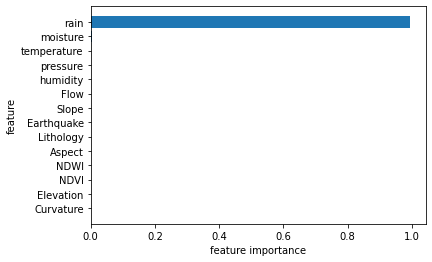

In [80]:
df_import.sort_values('importance', ascending=True, inplace=True)
coordinates=range(len(df_import))
plt.barh( y = coordinates , width = df_import['importance'] )
plt.yticks( coordinates , df_import['Feature'])
plt.xlabel('feature importance')
plt.ylabel('feature')

Text(0, 0.5, 'feature')

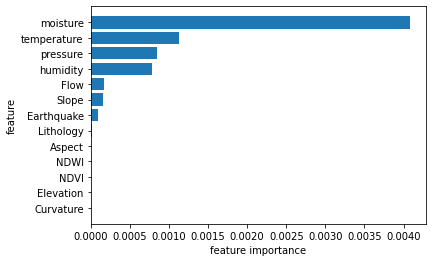

In [86]:
#rain row 빼고
df_import1 = df_import.copy()
df_import1 = df_import1.drop(11,axis=0)
df_import1.sort_values('importance', ascending=True, inplace=True)
coordinates1=range(len(df_import1))
plt.barh( y = coordinates1 , width = df_import1['importance'] )
plt.yticks( coordinates1 , df_import1['Feature'])
plt.xlabel('feature importance')
plt.ylabel('feature')

##SHAP

In [ ]:
! pip install pdpbox
from pdpbox.pdp import pdp_isolate, pdp_plot

In [ ]:
# dpi수치를 조정해 이미지 화질을 조정
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

feature = 'annual_inc'
isolated = pdp_isolate(
    model=linear, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);